# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Descriptive Statistics Assignment </span> </div>

###### Note: 
<div class="alert alert-block alert-danger"> <span style="font-family: Times New Roman"> 
    - Kindly use this notebook to solve the programming problems. <br>
    - Submit assignments with .ipynb file extension.<br>
- Kindly write down the explanations/insights for the graphs.<br>
- Kindly use comments or markdowns to explain logic behind the codes, approach to solve the problem.</span></div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
</p>
<p style='margin-left:1em;'>
<b>The below-given data is of two batsmen from which the captain has to select one batsman. As a captain, I need a batsman whose performance is stable in England. A test series is happening in England during winter. Use Descriptive statistics to select one batsman who can probably perform better than the other. Please give proper reasoning behind your selection, like why you have chosen the particular batsman supported by statistic outputs. You have to show your numerical findings with the help of Python code, and a theoretical interpretation also is given to support your conclusion. 
    </b></p>
    
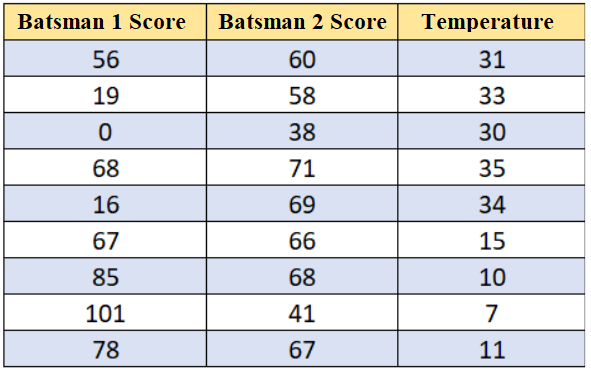

</span>
</div>



##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  <mark><span  style= "font-family: Times New Roman">View the data</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [2]:
data={
    
    'Batsman 1 Score':[56,19,0,68,16,67,85,101,78],
    'Batsman 2 Score':[60,58,38,71,69,66,68,41,67],
    'Temperature':[31,33,30,35,34,15,10,7,11]
    
}

data_frame=pd.DataFrame(data)
data_frame = pd.DataFrame(data, dtype='Int64')
data_frame

,Batsman 1 Score,Batsman 2 Score,Temperature
0,56,60,31
1,19,58,33
2,0,38,30
3,68,71,35
4,16,69,34
5,67,66,15
6,85,68,10
7,101,41,7
8,78,67,11



##  <mark><span  style= "font-family: Times New Roman">Data preprocessing</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
</p>
<p style='margin-left:1em;'>
</p><br>
   
  1. Third match score of Batsman-1 was mistakenly noted as 0. Kindly replace the value with the mean of earlier matches as it is not known.Round the calculated mean to the nearest integer. <br>    

2. Create a new feature in the dataframe naming 'weather' <br>
    
   a. Column should have 'Warm' if the temperature on the match day is greater than the mean of the temperatures.  <br>
   b. Column should have 'Cool' if the temperature on the match day is lesser than the mean of the temperatures.  <br>
</span>
</div>


In [3]:
# 1)--------

total_sum=0
count=0
for i in data_frame['Batsman 1 Score']:
    if i==0:
        break
    else:
        count+=1
        total_sum+=i
        
value=total_sum/count
mean=round(value)
mean


for i,value in enumerate(data_frame['Batsman 1 Score']):
    if value==0:
        data_frame.at[i,'Batsman 1 Score']=mean
        
        
data_frame

,Batsman 1 Score,Batsman 2 Score,Temperature
0,56,60,31
1,19,58,33
2,38,38,30
3,68,71,35
4,16,69,34
5,67,66,15
6,85,68,10
7,101,41,7
8,78,67,11


In [4]:
# 2------

temperature_mean=round(data_frame['Temperature'].mean())
temperature_mean

def calculate_weather(row):
    if(row['Temperature']>temperature_mean):
        return 'Warm'
    else:
        return 'cool'
    
data_frame['Weather']=data_frame.apply(calculate_weather,axis=1)
print(data_frame)
data_frame.to_csv('batsmen.csv',index=False)

   Batsman 1 Score  Batsman 2 Score  Temperature Weather
0               56               60           31    Warm
1               19               58           33    Warm
2               38               38           30    Warm
3               68               71           35    Warm
4               16               69           34    Warm
5               67               66           15    cool
6               85               68           10    cool
7              101               41            7    cool
8               78               67           11    cool


##  <mark><span  style= "font-family: Times New Roman">Perform EDA</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

### Visualize the evidences 

### Overall performance in England 

Batsmen 1 mean ,median is: 58.67 , 67.0
Batsmen 2 mean ,median is: 59.78 , 66.0


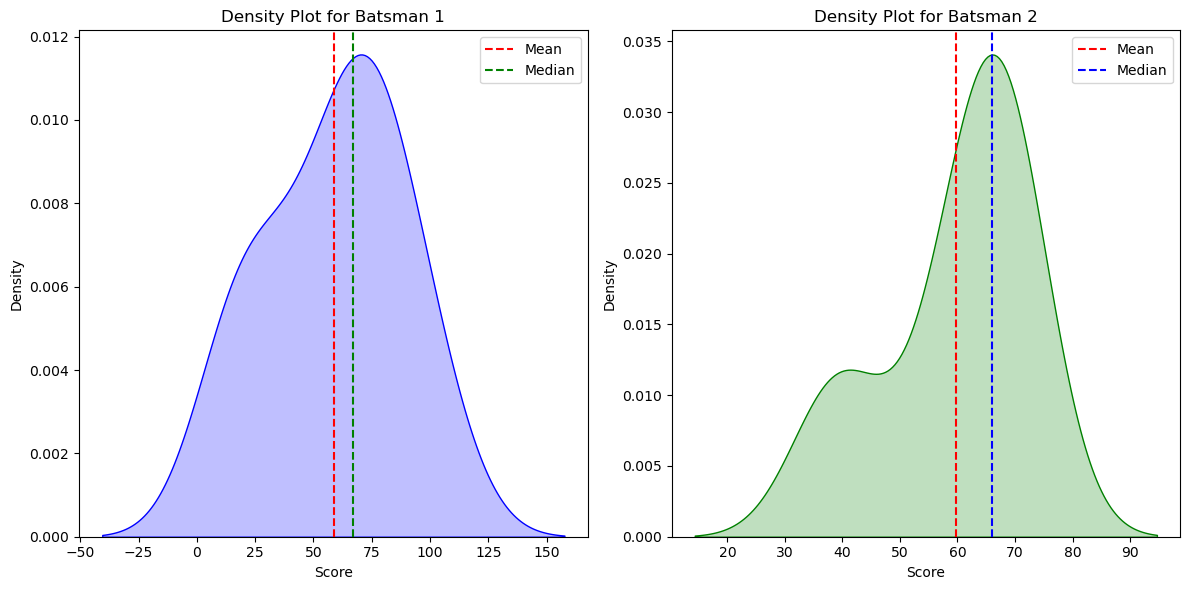

In [5]:
## Finding central tendency for each batsmen

##Batsmen 1 :

batsmen_1_mean=round(data_frame['Batsman 1 Score'].mean(),2)
batsmen_1_median=data_frame['Batsman 1 Score'].median()

##Batsmen 2 :

batsmen_2_mean=round(data_frame['Batsman 2 Score'].mean(),2)
batsmen_2_median=data_frame['Batsman 2 Score'].median()


print ('Batsmen 1 mean ,median is: {} , {}'.format(batsmen_1_mean,batsmen_1_median))
print ('Batsmen 2 mean ,median is: {} , {}'.format(batsmen_2_mean,batsmen_2_median))

plt.figure(figsize=(12, 6))

# Density plot for Batsman 1
plt.subplot(1, 2, 1)
sns.kdeplot(data_frame['Batsman 1 Score'].astype('float'), fill=True, color='blue')
plt.axvline(batsmen_1_mean, color='red', linestyle='--', label='Mean')
plt.axvline(batsmen_1_median, color='green', linestyle='--', label='Median')
plt.xlabel('Score')
plt.title('Density Plot for Batsman 1')
plt.legend()

# Density plot for Batsman 2
plt.subplot(1, 2, 2)
sns.kdeplot(data_frame['Batsman 2 Score'].astype('float'), fill=True, color='green')
plt.axvline(batsmen_2_mean, color='red', linestyle='--', label='Mean')
plt.axvline(batsmen_2_median, color='blue', linestyle='--', label='Median')
plt.xlabel('Score')
plt.title('Density Plot for Batsman 2')
plt.legend()

plt.tight_layout()
plt.show()



## Spread of measures for over all performance in england

In [6]:
## finding standard deviation 

batsmen_1_std=round(data_frame['Batsman 1 Score'].std(),2)
batsmen_2_std=round(data_frame['Batsman 2 Score'].std(),2)

print('Standard Deviation for Batsman 1 and Batsman 2 are {} ,{}'.format(batsmen_1_std,batsmen_2_std))

## finding IQR 

batsmen_1_iqr=np.percentile(data_frame['Batsman 1 Score'], 75)-np.percentile(data_frame['Batsman 1 Score'], 25)
batsmen_2_iqr=np.percentile(data_frame['Batsman 2 Score'], 75)-np.percentile(data_frame['Batsman 2 Score'], 25)

print('IQR for Batsman 1 and Batsman 2 are {} ,{}'.format(batsmen_1_iqr,batsmen_2_iqr))

## finding variance 

batsmen_1_var=round(np.var(data_frame['Batsman 1 Score']),2)
batsmen_2_var=round(np.var(data_frame['Batsman 2 Score']),2)

print('variance for Batsman 1 and Batsman 2 are {} ,{}'.format(batsmen_1_var,batsmen_2_var))

## finding coefficient of variation

batsmen_1_cv=round((batsmen_1_std/batsmen_1_mean)*100,2)
batsmen_2_cv=round((batsmen_2_std/batsmen_2_mean)*100,2)

print('coefficient of variation for Batsman 1 and Batsman 2 are {} ,{}'.format(batsmen_1_cv,batsmen_2_cv))

Standard Deviation for Batsman 1 and Batsman 2 are 29.25 ,12.25
IQR for Batsman 1 and Batsman 2 are 40.0 ,10.0
variance for Batsman 1 and Batsman 2 are 760.44 ,133.28
coefficient of variation for Batsman 1 and Batsman 2 are 49.86 ,20.49


### Ploting the all data 



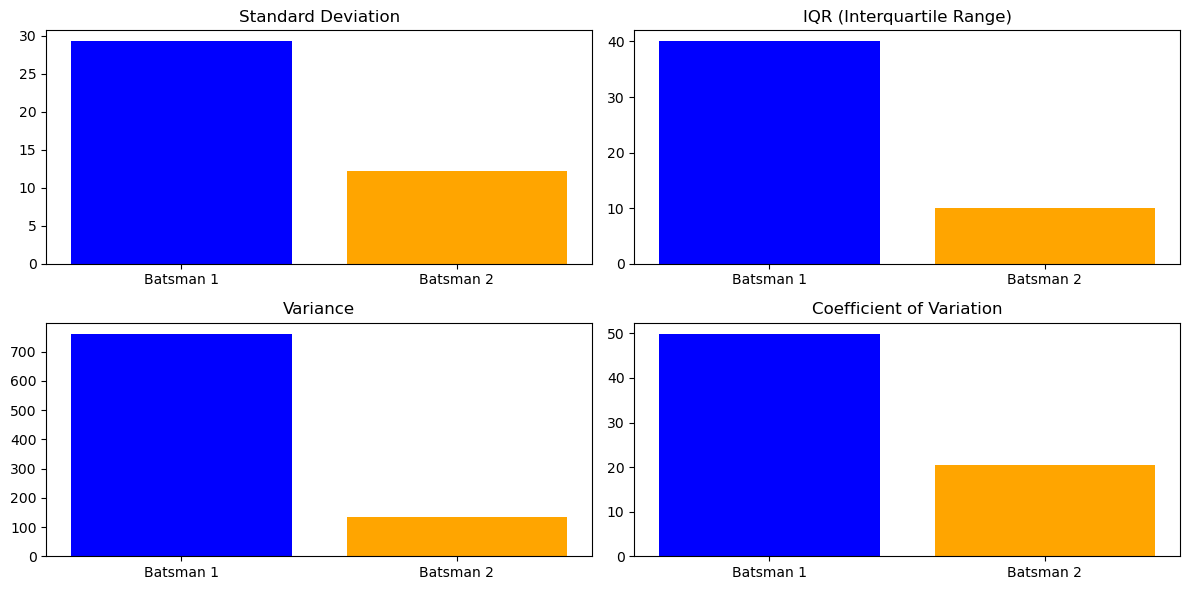

In [7]:

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.bar(['Batsman 1', 'Batsman 2'], [batsmen_1_std, batsmen_2_std], color=['blue', 'orange'])
plt.title('Standard Deviation')

plt.subplot(2, 2, 2)
plt.bar(['Batsman 1', 'Batsman 2'], [batsmen_1_iqr, batsmen_2_iqr], color=['blue', 'orange'])
plt.title('IQR (Interquartile Range)')

plt.subplot(2, 2, 3)
plt.bar(['Batsman 1', 'Batsman 2'], [batsmen_1_var, batsmen_2_var], color=['blue', 'orange'])
plt.title('Variance')

plt.subplot(2, 2, 4)
plt.bar(['Batsman 1', 'Batsman 2'], [batsmen_1_cv, batsmen_2_cv], color=['blue', 'orange'])
plt.title('Coefficient of Variation')

plt.tight_layout()
plt.show()



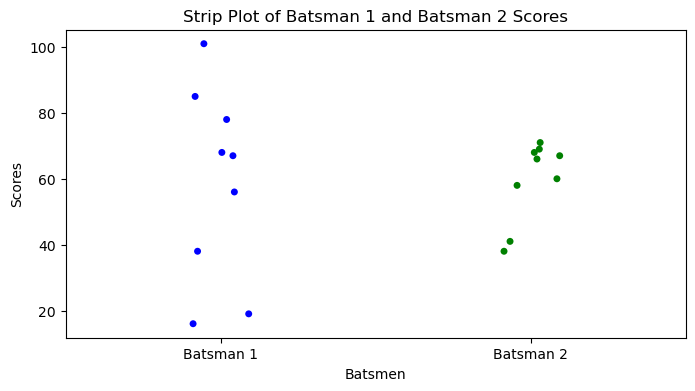

In [8]:
plt.figure(figsize=(8, 4))
sns.stripplot(data=[data_frame['Batsman 1 Score'], data_frame['Batsman 2 Score']], jitter=True, palette=["blue", "green"])
plt.xlabel("Batsmen")
plt.ylabel("Scores")
plt.title("Strip Plot of Batsman 1 and Batsman 2 Scores")
plt.xticks([0, 1], ["Batsman 1", "Batsman 2"])
plt.show()

# Performance Analysis of each batsman in winter

Batsmen 1 mean ,median during winter is: 82.75 , 81.5
Batsmen 2 mean ,median during winter is: 60.5 , 66.5


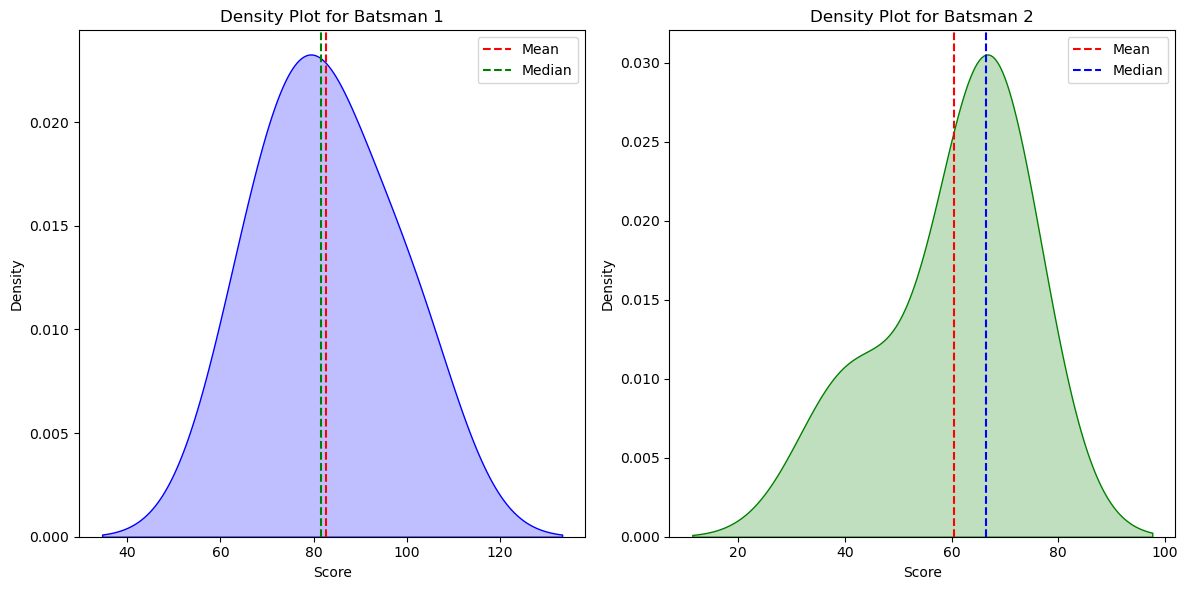

In [9]:
## Finding central tendency for each batsmen during winter 



batsman_1_winter_data = data_frame[data_frame['Weather'] == 'cool']['Batsman 1 Score']
batsman_2_winter_data = data_frame[data_frame['Weather'] == 'cool']['Batsman 2 Score']


##Batsmen 1 :

batsmen_1_winter_mean=round(batsman_1_winter_data.mean(),2)
batsmen_1_winter_median=batsman_1_winter_data.median()

##Batsmen 2 :

batsmen_2_winter_mean=round(batsman_2_winter_data.mean(),2)
batsmen_2_winter_median=batsman_2_winter_data.median()


print ('Batsmen 1 mean ,median during winter is: {} , {}'.format(batsmen_1_winter_mean,batsmen_1_winter_median))
print ('Batsmen 2 mean ,median during winter is: {} , {}'.format(batsmen_2_winter_mean,batsmen_2_winter_median))


plt.figure(figsize=(12, 6))

# Density plot for Batsman 1
plt.subplot(1, 2, 1)
sns.kdeplot(batsman_1_winter_data.astype('float'), fill=True, color='blue')
plt.axvline(batsmen_1_winter_mean, color='red', linestyle='--', label='Mean')
plt.axvline(batsmen_1_winter_median, color='green', linestyle='--', label='Median')
plt.xlabel('Score')
plt.title('Density Plot for Batsman 1')
plt.legend()

# Density plot for Batsman 2
plt.subplot(1, 2, 2)
sns.kdeplot(batsman_2_winter_data.astype('float'), fill=True, color='green')
plt.axvline(batsmen_2_winter_mean, color='red', linestyle='--', label='Mean')
plt.axvline(batsmen_2_winter_median, color='blue', linestyle='--', label='Median')
plt.xlabel('Score')
plt.title('Density Plot for Batsman 2')
plt.legend()

plt.tight_layout()
plt.show()


# Spread of measures during winter in england

In [10]:
## finding standard deviation 

batsmen_1_winter_std=round(batsman_1_winter_data.std(),2)
batsmen_2_winter_std=round(batsman_2_winter_data.std(),2)

print('Standard Deviation for Batsman 1 and Batsman 2 during winter are {} ,{}'.format(batsmen_1_winter_std,batsmen_2_winter_std))

## finding IQR 

batsmen_1_winter_iqr=np.percentile(batsman_1_winter_data, 75)-np.percentile(batsman_1_winter_data, 25)
batsmen_2_winter_iqr=np.percentile(batsman_2_winter_data, 75)-np.percentile(batsman_2_winter_data, 25)

print('IQR for Batsman 1 and Batsman 2 during winter are {} ,{}'.format(batsmen_1_winter_iqr,batsmen_2_winter_iqr))

## finding variance 

batsmen_1_winter_var=round(np.var(batsman_1_winter_data),2)
batsmen_2_winter_var=round(np.var(batsman_2_winter_data),2)

print('variance for Batsman 1 and Batsman 2 during winter are {} ,{}'.format(batsmen_1_winter_var,batsmen_2_winter_var))

## finding coefficient of variation

batsmen_1_winter_cv=round((batsmen_1_winter_std/batsmen_1_winter_mean)*100,2)
batsmen_2_winter_cv=round((batsmen_2_winter_std/batsmen_2_winter_mean)*100,2)

print('coefficient of variation for Batsman 1 and Batsman 2 during winter are {} ,{}'.format(batsmen_1_winter_cv,batsmen_2_winter_cv))

Standard Deviation for Batsman 1 and Batsman 2 during winter are 14.24 ,13.03
IQR for Batsman 1 and Batsman 2 during winter are 13.75 ,7.5
variance for Batsman 1 and Batsman 2 during winter are 152.19 ,127.25
coefficient of variation for Batsman 1 and Batsman 2 during winter are 17.21 ,21.54


# ploting the data during winter 

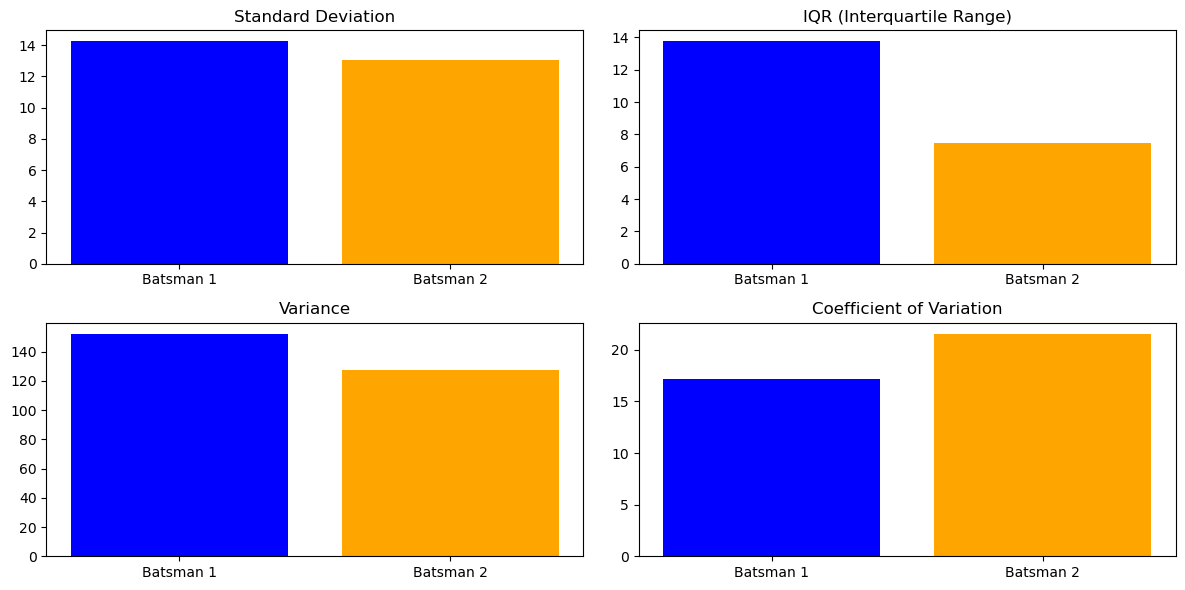

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.bar(['Batsman 1', 'Batsman 2'], [batsmen_1_winter_std, batsmen_2_winter_std], color=['blue', 'orange'])
plt.title('Standard Deviation')

plt.subplot(2, 2, 2)
plt.bar(['Batsman 1', 'Batsman 2'], [batsmen_1_winter_iqr, batsmen_2_winter_iqr], color=['blue', 'orange'])
plt.title('IQR (Interquartile Range)')

plt.subplot(2, 2, 3)
plt.bar(['Batsman 1', 'Batsman 2'], [batsmen_1_winter_var, batsmen_2_winter_var], color=['blue', 'orange'])
plt.title('Variance')

plt.subplot(2, 2, 4)
plt.bar(['Batsman 1', 'Batsman 2'], [batsmen_1_winter_cv, batsmen_2_winter_cv], color=['blue', 'orange'])
plt.title('Coefficient of Variation')

plt.tight_layout()
plt.show()

# ploting scores during winter 

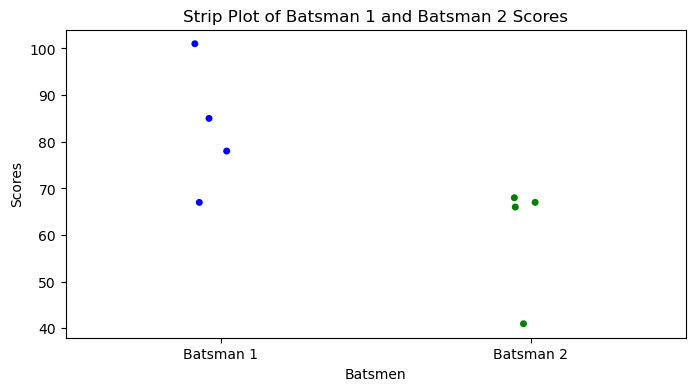

In [12]:
plt.figure(figsize=(8, 4))
sns.stripplot(data=[batsman_1_winter_data, batsman_2_winter_data], jitter=True, palette=["blue", "green"])
plt.xlabel("Batsmen")
plt.ylabel("Scores")
plt.title("Strip Plot of Batsman 1 and Batsman 2 Scores")
plt.xticks([0, 1], ["Batsman 1", "Batsman 2"])
plt.show()

### Correlation coefficient only for winter 

Correlation coefficient for Batsman 1 in cool weather: -0.9791291960082003
Correlation coefficient for Batsman 2 in cool weather: 0.716435651815297


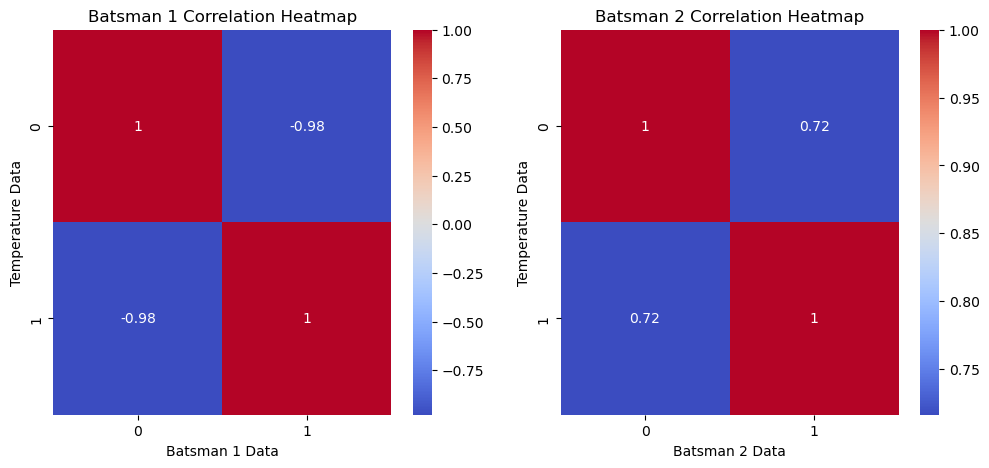

In [13]:

temperature_cool = data_frame[data_frame['Weather'] == 'cool']['Temperature']

# Calculate correlation coefficients
cor_batsman1_cool = np.corrcoef(batsman_1_winter_data.astype('float'), temperature_cool.astype('float'))
cor_batsman2_cool = np.corrcoef(batsman_2_winter_data.astype('float'), temperature_cool.astype('float'))

print("Correlation coefficient for Batsman 1 in cool weather:", cor_batsman1_cool[0,1])
print("Correlation coefficient for Batsman 2 in cool weather:", cor_batsman2_cool[0,1])


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create a heatmap to visualize the correlation
sns.heatmap(cor_batsman1_cool, annot=True, cmap='coolwarm', ax=axes[0])
sns.heatmap(cor_batsman2_cool, annot=True, cmap='coolwarm', ax=axes[1])

# Set labels and title
axes[0].set_title('Batsman 1 Correlation Heatmap')
axes[0].set_xlabel('Batsman 1 Data')
axes[0].set_ylabel('Temperature Data')

axes[1].set_title('Batsman 2 Correlation Heatmap')
axes[1].set_xlabel('Batsman 2 Data')
axes[1].set_ylabel('Temperature Data')

# Show the plot
plt.show()

##  <mark><span  style= "font-family: Times New Roman">Conclusion</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

I have obtained the data for both overall performance and performance during winter for both batsman 1 and batsman 2
in England 

Points to Note 

Overall performance:
    
    1) mean and median for batsman 2 is higher than batsman 1
    2) Std,variance ,IQR and Coefficient of Variation are less for batsman 2 compared to batsman 1 which 
       indicates stable performance
    3) stripplot also shows that bastman 2 score are clustred around mean again indicates stable 
       performance of bastman 2 

Performance during winter:
    
    1) mean and median for batsman 1 is higher than batsman 2
    2) Std,variance ,IQR are less for batsman 2 compared to batsman 1 but
       Coefficient of Variation is higher than batsman 1    
    3) Even Correlation coefficient also shows batsman 1 has advantage over batman 2 

    
Final Verdict :
    
    Batsman 2 performe consistently in England but bastman 1 has scored more run than batsman 2 
    during winter which is shown in mean and medain and  state like  correlation coefficent and coefficiant of   variation shows better performance of batsman 1 in winter so considering over all performance in england and great performance during winter as a captian I choose batsman 1 over batsman 2 since match is going to 
    happen in winter

    